In [1]:
# Install ReadVTK with: import Pkg; Pkg.add("ReadVTK")

using ReadVTK

# Loading VTI files into Julia

function read_vti( filename, typ=Float64 )
    vtk_file       = VTKFile( filename )
    vtk_cell_data  = get_cell_data(vtk_file)
    vtk_data_array = vtk_cell_data["intensities"]
    data_size, _   = ReadVTK.get_wholeextent(vtk_data_array.vtk_file.xml_file, false)
    vtk_data       = get_data( vtk_data_array ); 
    data_reshaped  = reshape(vtk_data, (data_size .- 1 )...); 
    return typ.( data_reshaped ) 
end


read_vti (generic function with 2 methods)

In [110]:
# Extract the i-th layer from vti files.

function extract_layer(folder_path, i)
    # variable folder_path should be in type string.
    #n_files = length(readdir(folder_path))
    
    # Storing data from a single layer over time in an Array. 
    #layer_data = []
    layer_data = Matrix{Float64}[]
    
    for file in readdir(folder_path)
        # file is in type String. Open the file.
        cell_data = read_vti(folder_path * "\\" * file)
        # Choose the i-th layer from the cell data and append it 
        # to layer_data.
        push!(layer_data, cell_data[:,:,i])
        
    end
    return layer_data
end

    

extract_layer (generic function with 1 method)

In [102]:
cell_data = read_vti("F:\\Downloads\\headon_data\\tp0.vti")

1024×1024×14 Array{Float64, 3}:
[:, :, 1] =
  48.0   181.0  507.0    55.0   47.0  …    62.0    63.0    22.0    20.0
  41.0    81.0   65.0   496.0   38.0      386.0   214.0   144.0    65.0
  96.0    46.0   74.0   300.0   40.0        7.0    49.0   208.0   306.0
  66.0    37.0   80.0   597.0  879.0       37.0    27.0   879.0   769.0
  53.0   452.0  761.0   367.0   29.0      127.0    19.0   844.0   604.0
 760.0    36.0   22.0   731.0   17.0  …    27.0    91.0   212.0    49.0
 190.0  1004.0   46.0   379.0  576.0      430.0  1331.0   104.0    64.0
  29.0    81.0   14.0    30.0   38.0      700.0    88.0    64.0    37.0
 324.0   711.0  300.0   520.0   44.0       70.0   197.0    63.0    75.0
  53.0   193.0   64.0   851.0   61.0       76.0    73.0   254.0    62.0
 353.0    27.0   64.0    51.0  532.0  …    55.0   495.0    72.0   538.0
  44.0  1094.0   50.0    77.0   53.0       82.0    52.0    60.0    50.0
 170.0   480.0   72.0    72.0  996.0       51.0   721.0    37.0   114.0
   ⋮                

In [33]:
using PyPlot

In [111]:
# Data from layer 2. 

l_data = extract_layer("F:\\Downloads\\headon_data", 2)

1024×1024×11 Array{Float64, 3}:
[:, :, 1] =
   80.0    43.0    81.0    35.0   55.0  …   919.0  1204.0   366.0   329.0
   83.0    51.0    30.0    46.0   34.0      789.0   681.0   204.0  1294.0
  397.0    25.0   292.0   252.0  120.0       29.0    42.0   227.0    42.0
   78.0   922.0    19.0    96.0   84.0      378.0   184.0   620.0    22.0
  618.0   431.0    96.0   259.0  621.0      166.0    63.0   137.0   974.0
 1252.0    51.0  1439.0    48.0   94.0  …   922.0  1077.0    33.0   734.0
  899.0    74.0    30.0   824.0   37.0      284.0   665.0   548.0    58.0
  728.0  1014.0   493.0    70.0   57.0       52.0    51.0   246.0    26.0
   52.0   572.0    42.0   527.0  103.0      116.0   635.0  1025.0  1035.0
  212.0    48.0    34.0   549.0  500.0       34.0    98.0   369.0   190.0
 1280.0   175.0   476.0   614.0  485.0  …   127.0   478.0   585.0   625.0
  469.0   342.0   738.0   877.0   44.0      517.0   965.0   107.0  1213.0
  176.0  2265.0    48.0   527.0  610.0      336.0  1090.0    94.0   

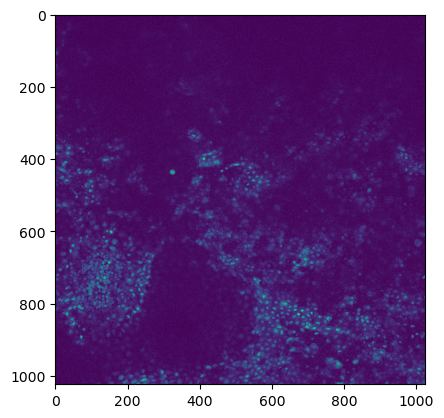

PyObject <matplotlib.image.AxesImage object at 0x000001446CBD8040>

In [113]:
imshow(l_data[:,:,10])

In [109]:
# reduce((x,y) -> cat(x,y,dims=3), l_data)

1024×1024×11 Array{Float64, 3}:
[:, :, 1] =
   80.0    43.0    81.0    35.0   55.0  …   919.0  1204.0   366.0   329.0
   83.0    51.0    30.0    46.0   34.0      789.0   681.0   204.0  1294.0
  397.0    25.0   292.0   252.0  120.0       29.0    42.0   227.0    42.0
   78.0   922.0    19.0    96.0   84.0      378.0   184.0   620.0    22.0
  618.0   431.0    96.0   259.0  621.0      166.0    63.0   137.0   974.0
 1252.0    51.0  1439.0    48.0   94.0  …   922.0  1077.0    33.0   734.0
  899.0    74.0    30.0   824.0   37.0      284.0   665.0   548.0    58.0
  728.0  1014.0   493.0    70.0   57.0       52.0    51.0   246.0    26.0
   52.0   572.0    42.0   527.0  103.0      116.0   635.0  1025.0  1035.0
  212.0    48.0    34.0   549.0  500.0       34.0    98.0   369.0   190.0
 1280.0   175.0   476.0   614.0  485.0  …   127.0   478.0   585.0   625.0
  469.0   342.0   738.0   877.0   44.0      517.0   965.0   107.0  1213.0
  176.0  2265.0    48.0   527.0  610.0      336.0  1090.0    94.0   

In [114]:
size(l_data)

(1024, 1024, 11)

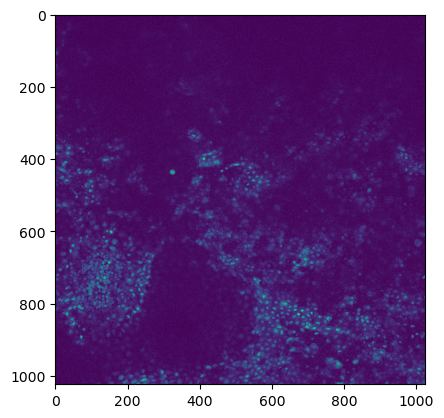

PyObject <matplotlib.image.AxesImage object at 0x000001446570C7F0>

In [26]:
imshow(l_data[10])

In [89]:
# Completely destoryed the data structure. 

#=
using DelimitedFiles


writedlm("txt_file.txt", l_data)
=#

In [86]:
# JSON works BUT: the data type will NOT be saved and is therefore not
# efficient for further analysis!

#= 
using JSON

layer = 2
cell_images = l_data
data = Dict("layer" => layer, "cell_images" => cell_images)

open("foo.json", "w") do f
    JSON.print(f, data)
end

load_data = JSON.parsefile("C:\\Users\\Rutian Zhou\\PIV\\foo.json")
=#

In [78]:
load_data["cell_images"][10]

1024-element Vector{Any}:
 Any[283.0, 42.0, 33.0, 163.0, 344.0, 58.0, 629.0, 731.0, 150.0, 92.0  …  805.0, 29.0, 54.0, 56.0, 1241.0, 486.0, 1006.0, 47.0, 239.0, 217.0]
 Any[579.0, 45.0, 34.0, 1142.0, 27.0, 50.0, 900.0, 326.0, 879.0, 142.0  …  563.0, 744.0, 923.0, 59.0, 43.0, 43.0, 668.0, 295.0, 529.0, 327.0]
 Any[24.0, 47.0, 98.0, 25.0, 22.0, 675.0, 31.0, 67.0, 39.0, 428.0  …  1169.0, 893.0, 68.0, 530.0, 34.0, 25.0, 140.0, 104.0, 208.0, 41.0]
 Any[132.0, 59.0, 49.0, 44.0, 130.0, 23.0, 344.0, 39.0, 65.0, 49.0  …  61.0, 79.0, 75.0, 334.0, 31.0, 225.0, 363.0, 10.0, 27.0, 569.0]
 Any[635.0, 14.0, 43.0, 62.0, 130.0, 37.0, 138.0, 494.0, 72.0, 32.0  …  65.0, 58.0, 810.0, 49.0, 36.0, 60.0, 11.0, 8.0, 55.0, 63.0]
 Any[680.0, 26.0, 50.0, 133.0, 577.0, 404.0, 32.0, 44.0, 68.0, 316.0  …  56.0, 51.0, 58.0, 207.0, 48.0, 91.0, 48.0, 1008.0, 65.0, 220.0]
 Any[1417.0, 30.0, 404.0, 32.0, 51.0, 52.0, 362.0, 433.0, 254.0, 35.0  …  83.0, 635.0, 14.0, 36.0, 27.0, 473.0, 403.0, 803.0, 1489.0, 104.0]
 Any[73.

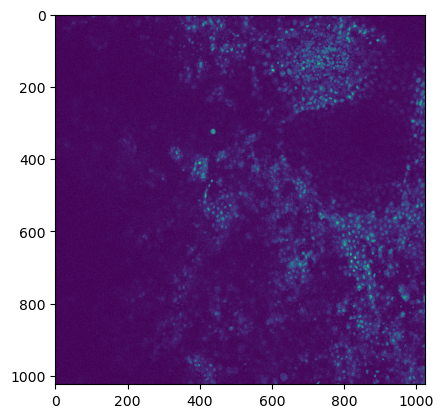

PyObject <matplotlib.image.AxesImage object at 0x00000144C5391330>

In [77]:
imshow(transpose(load_data["cell_images"][10]))  # The image is transformed! :/

In [85]:
using JLD

save("l_data.jdl", "data", l_data)

LoadError: No applicable_savers found for UNKNOWN

In [123]:
using HDF5

h5open("mydata_"*string(2)*".h5", "w") do file
    write(file, "A", l_data)  # alternatively, say "@write file A"
end

In [116]:
c = h5open("mydata.h5", "r") do file
    read(file, "A")
end

1024×1024×11 Array{Float64, 3}:
[:, :, 1] =
   80.0    43.0    81.0    35.0   55.0  …   919.0  1204.0   366.0   329.0
   83.0    51.0    30.0    46.0   34.0      789.0   681.0   204.0  1294.0
  397.0    25.0   292.0   252.0  120.0       29.0    42.0   227.0    42.0
   78.0   922.0    19.0    96.0   84.0      378.0   184.0   620.0    22.0
  618.0   431.0    96.0   259.0  621.0      166.0    63.0   137.0   974.0
 1252.0    51.0  1439.0    48.0   94.0  …   922.0  1077.0    33.0   734.0
  899.0    74.0    30.0   824.0   37.0      284.0   665.0   548.0    58.0
  728.0  1014.0   493.0    70.0   57.0       52.0    51.0   246.0    26.0
   52.0   572.0    42.0   527.0  103.0      116.0   635.0  1025.0  1035.0
  212.0    48.0    34.0   549.0  500.0       34.0    98.0   369.0   190.0
 1280.0   175.0   476.0   614.0  485.0  …   127.0   478.0   585.0   625.0
  469.0   342.0   738.0   877.0   44.0      517.0   965.0   107.0  1213.0
  176.0  2265.0    48.0   527.0  610.0      336.0  1090.0    94.0   

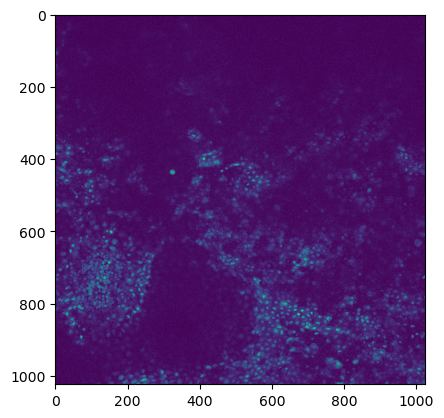

PyObject <matplotlib.image.AxesImage object at 0x000001446CC78BE0>

In [117]:
imshow(c[:,:,10])

In [6]:
# Doing PIV for two time points. 

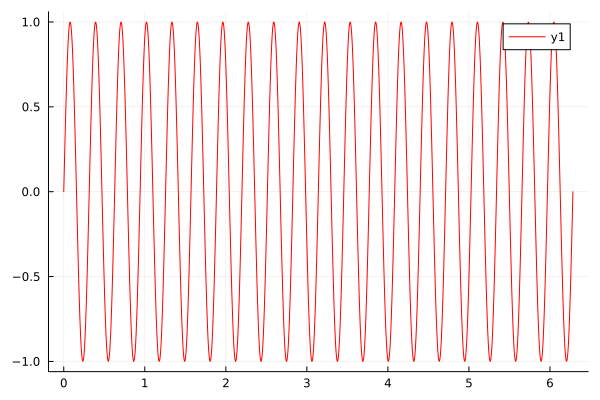

Done!


In [7]:
# Could be useful to generate the dynamic animation after PIV maps.

using Plots
for i in 1:20
    IJulia.clear_output(true)
    x = range(0,2*pi,1000); y = sin.(i*x)
    Plots.display(Plots.plot(x,y, color="red"))
    sleep(0.1)
end
println("Done!")